In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
x = pd.read_csv('./train.csv', index_col='Id')
x_test = pd.read_csv("./train.csv",index_col='Id')

In [3]:
x.dropna(axis = 0, inplace=True, subset= ['SalePrice'])
y = x['SalePrice']

x.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:

low_cardinality_cols = [cols for cols in X_train_full.columns 
                        
                        if X_train_full[cols].nunique() < 10 and
                        X_train_full[cols].dtype == "object"]

In [6]:
numeric_cols = [cols for cols in X_train_full.columns 
                 if X_train_full[cols].dtype in ['int64', 'float64']]


In [7]:
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = x_test[my_cols].copy()

X_train = pd.get_dummies(X_train)
X_valid - pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)

X_train, X_valid = X_train.align(X_valid, join = 'left',axis=1)
X_train,X_test = X_train.align(X_test, join = 'left', axis=1)

In [8]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state = 0)
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [9]:
predictions = model.predict(X_valid)
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_valid, predictions)
print("MAE:", mae1)

MAE: 28216.435546875


In [10]:
my_model2 =XGBRegressor(n_estimators= 100, learning_rate = 0.05)
my_model2.fit(X_train,y_train)
pred2 = my_model2.predict(X_valid)
mae2 = mean_absolute_error(y_valid, pred2)
print("MAE with tuned model:", mae2)


MAE with tuned model: 23303.396484375


In [11]:
my_model3 = XGBRegressor(n_estimators= 1000 ,learning_rate = 1, max_depth= 3, subsample= 0.5)
my_model3.fit(X_train,y_train)
pred3 = my_model3.predict(X_valid)
mae3 = mean_absolute_error(y_valid, pred3)
print("MAE with tuned model:", mae3)


MAE with tuned model: 134423.703125


In [12]:
# Make predictions with my_model3
predictions = my_model3.predict(X_test)

# Create submission DataFrame
output = pd.DataFrame({'Id': X_test.index, 'SalePrice': predictions})

# Save to CSV
output.to_csv('submission.csv', index=False)

print("submission.csv file created!")


submission.csv file created!


In [13]:
my_model4 =XGBRegressor(n_estimators= 1 )
my_model4.fit(X_train,y_train)
pred4 = my_model4.predict(X_valid)
mae4 = mean_absolute_error(y_valid, pred4)
print("MAE with tuned model:", mae4)


MAE with tuned model: 47672.69140625


In [14]:
pred = my_model3.predict(X_test)

In [15]:
pred = pd.Series(pred, index=X_test.index, name="SalePrice")
pred.to_csv("submission.csv", header=True)

In [16]:
# Make predictions with my_model3
predictions = my_model2.predict(X_test)

# Create submission DataFrame
output = pd.DataFrame({'Id': X_test.index, 'SalePrice': predictions})

# Save to CSV
output.to_csv('submission1.csv', index=False)

print("submission.csv file created!")


submission.csv file created!


In [17]:
from sklearn.metrics import mean_absolute_error

# Predict using my_model3
pred3 = my_model2.predict(X_valid)

# Calculate MAE
mae3 = mean_absolute_error(y_valid, pred3)
print("MAE with my_model3:", mae3)

# Estimate accuracy
avg_price = y_valid.mean()
accuracy = 100 - (mae3 / avg_price * 100)
print(f"Approximate Accuracy: {accuracy:.2f}%")


MAE with my_model3: 23303.396484375
Approximate Accuracy: 87.15%


In [18]:
from sklearn.metrics import r2_score

# Predict with my_model3
pred3 = my_model2.predict(X_valid)

# Calculate R² score
r2 = r2_score(y_valid, pred3)
print(f"R² Score for my_model3: {r2:.4f}")



R² Score for my_model3: 0.7870


In [19]:
accuracy_like = r2_score(y_valid, pred3) * 100
print(f"Accuracy-like score: {accuracy_like:.2f}%")


Accuracy-like score: 78.70%


📊 Evaluation of my_model3:
  ✅ MAE  : 23303.40
  ✅ RMSE : 38348.88
  ✅ R²    : 0.7870 (~ 78.70% accuracy-like)


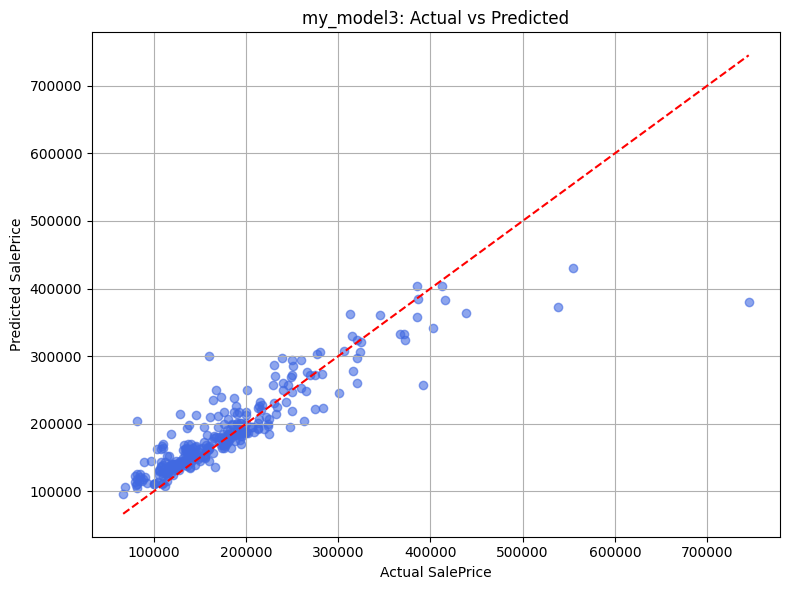

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on validation data
pred3 = my_model2.predict(X_valid)

# Evaluation Metrics
mae = mean_absolute_error(y_valid, pred3)
rmse = np.sqrt(mean_squared_error(y_valid, pred3))
r2 = r2_score(y_valid, pred3)

print(f"📊 Evaluation of my_model3:")
print(f"  ✅ MAE  : {mae:.2f}")
print(f"  ✅ RMSE : {rmse:.2f}")
print(f"  ✅ R²    : {r2:.4f} (~ {r2 * 100:.2f}% accuracy-like)")

# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_valid, pred3, alpha=0.6, color='royalblue')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--r')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('my_model3: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# ==========================
# ML Pipeline Integration
# ==========================
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# Separate features and target
X = x.copy()
y = y.copy()  # Assuming 'y' is defined earlier as SalePrice

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

# Define the model (you can replace with any regressor you prefer)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the full pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# Split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
model_pipeline.fit(X_train, y_train)

# Evaluate the pipeline
score = model_pipeline.score(X_valid, y_valid)
print(f"Validation R² score: {score:.4f}")

# Optionally: cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5)
print(f"Cross-validation mean R²: {cv_scores.mean():.4f}")


Validation R² score: 0.8946
Cross-validation mean R²: 0.8573
